In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter

import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning, message="underflow encountered*")
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv('books2025.csv')
df.head()

,1,isbn,author,tag_author,name,publisher,city,type_of_printing,printing,publ_date,...,language,type,cover,read,series,condition,inscription,format,pages,from
0,1,5-85009-369-9,Шарлотта Мари Йонж,Йонж,Таинственные приключения маленького герцога Ри...,Советский спорт,Москва,Основной,70000.0,1993.0,...,русский,роман,твёрдая,False,NaN,normal - old,NaN,84*108(1/32),125.0,в электричке
1,2,978-0-7535-1816-8,Charles Bukowski,Буковски,Post Office,Virgin Books,NaN,NaN,NaN,2009.0,...,english,роман,мягкая,True,NaN,normal - new,NaN,NaN,160.0,Старая книга
2,3,NaN,Илья Ильф. Евгений Петров,Ильф/Петров,Двенадать стульев. Золотой телёнок.,Туркменское ГИ,Ашхабад,Основной,125000.0,1957.0,...,русский,сборник,твёрдая,False,NaN,NaN,NaN,84*108(1/32),652.0,со Светлановского
3,4,NaN,Йон Друцэ,Друцэ,Возвращение на круги своя,Молодая гвардия,Москва,Основной,100000.0,1974.0,...,русский,сборник,твёрдая,False,NaN,medium - old,NaN,70*108(1/32),400.0,Светлана-ПП
4,5,NaN,Ален-Рене Лесаж,Лесаж,Хромой бес,ГИ художественной литературы,Москва,Основной,150000.0,1956.0,...,русский,роман,твёрдая,False,NaN,NaN,NaN,84*108(1/32),232.0,Старая книга


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   1                 1525 non-null   int64  
 1   isbn              988 non-null    object 
 2   author            1524 non-null   object 
 3   tag_author        1180 non-null   object 
 4   name              1525 non-null   object 
 5   publisher         1523 non-null   object 
 6   city              1519 non-null   object 
 7   type_of_printing  1520 non-null   object 
 8   printing          1452 non-null   float64
 9   publ_date         1523 non-null   float64
 10  year_of_w         543 non-null    object 
 11  language          1525 non-null   object 
 12  type              1525 non-null   object 
 13  cover             1525 non-null   object 
 14  read              1525 non-null   bool   
 15  series            734 non-null    object 
 16  condition         1516 non-null   object 


In [4]:
df.shape

(1525, 21)

#### WORK LINE

Interesting research tasks: 

- Request lists of the top 10 authors from neural networks, compare them with your own (by country, style, time - compare the number of authors available)
- Compare different lists of top books with books that I have
- The proportion of modern books in the novel/novella/autobiography sections

Plots:

- The percentage of reading (pieplot) +
- The percentage of time-read publications is the Russian Empire, the USSR and Russia (pie-plots) +
- Popular authors, read authors, publishers (wordscloud) +
- Distributions - printings, number of pages, date of publication, date of writing (histogram) +
- Condition of books (catplot) +
- Language distibution
- Most readable publishers

New features:

- Divide publ_date to different time period +
- Divide conditions on two separated columns +

Corrections data:

- type
- language
- year_of_w

<div style="
  background-color: #abaed9; /* Яркий светло-голубой фон */
  border-bottom: 4px #0077b6; /* Пунктирный синий border */
  padding: 25px;
  text-align: center;
  font-family: 'Playfair Display', serif; /* Элегантный шрифт */
  border-radius: 6px; /* Закругленные углы для div */
  box-shadow: 2px 4px 10px rgba(0,0,0,0.2); /* Лёгкая тень для div */
">
     <h2 style="font-size: 28px; font-weight: bold;">
EDA
  </h2>
</div>

In [7]:
#check nulls

df.isnull().sum()

1                      0
isbn                 537
author                 1
tag_author           345
name                   0
publisher              2
city                   6
type_of_printing       5
printing              73
publ_date              2
year_of_w            982
language               0
type                   0
cover                  0
read                   0
series               791
condition              9
inscription         1479
format                56
pages                 20
from                   0
dtype: int64

In [8]:
df[df.author.isnull() == True]

,1,isbn,author,tag_author,name,publisher,city,type_of_printing,printing,publ_date,...,language,type,cover,read,series,condition,inscription,format,pages,from
333,334,5-270-011445-9,NaN,NaN,Трёхсотлетие дома Романовых. 1613 - 1913,Современник,Москва,Основной,100000.0,1992.0,...,русский,история,твёрдая,False,NaN,medium - old,NaN,70*90(1/16),320.0,была


In [9]:
#create functions to make new columns

def get_decade(year):
        if pd.isna(year):
            return np.nan
        year = int(year)
        if year < 1870:
            return np.nan # Возвращаем NaN, если год раньше 1870
        if year > 2025:
            return np.nan # Возвращаем NaN, если год позже 2025
        return f'{year // 10 * 10}s'

def get_historical_period(year):
      if pd.isna(year):
          return np.nan
      year = int(year)

      if year >= 1721 and year <= 1917:
          return "Российская империя"
      elif year >= 1922 and year <= 1991:
          return "СССР"
      elif year >= 1992 and year <= 2025:
          return "Россия"
      else:
          return np.nan

#create new columns
df['decade'] = df['publ_date'].apply(get_decade)
df['historical_period'] = df['publ_date'].apply(get_historical_period)

In [10]:
df.head()

,1,isbn,author,tag_author,name,publisher,city,type_of_printing,printing,publ_date,...,cover,read,series,condition,inscription,format,pages,from,decade,historical_period
0,1,5-85009-369-9,Шарлотта Мари Йонж,Йонж,Таинственные приключения маленького герцога Ри...,Советский спорт,Москва,Основной,70000.0,1993.0,...,твёрдая,False,NaN,normal - old,NaN,84*108(1/32),125.0,в электричке,1990s,Россия
1,2,978-0-7535-1816-8,Charles Bukowski,Буковски,Post Office,Virgin Books,NaN,NaN,NaN,2009.0,...,мягкая,True,NaN,normal - new,NaN,NaN,160.0,Старая книга,2000s,Россия
2,3,NaN,Илья Ильф. Евгений Петров,Ильф/Петров,Двенадать стульев. Золотой телёнок.,Туркменское ГИ,Ашхабад,Основной,125000.0,1957.0,...,твёрдая,False,NaN,NaN,NaN,84*108(1/32),652.0,со Светлановского,1950s,СССР
3,4,NaN,Йон Друцэ,Друцэ,Возвращение на круги своя,Молодая гвардия,Москва,Основной,100000.0,1974.0,...,твёрдая,False,NaN,medium - old,NaN,70*108(1/32),400.0,Светлана-ПП,1970s,СССР
4,5,NaN,Ален-Рене Лесаж,Лесаж,Хромой бес,ГИ художественной литературы,Москва,Основной,150000.0,1956.0,...,твёрдая,False,NaN,NaN,NaN,84*108(1/32),232.0,Старая книга,1950s,СССР


<div class="alert alert-block alert-info" style="
            border-radius:2px;
            border: 1px solid #1C6EA4;
            background-color:#f0deaf;
            text-align: center; 
            font-family:Times New Roman;;
            letter-spacing:0.7px">

<h1 style="font-size: 18px; font-weight: bold;">
    READING PERCENTS
  </h1>
</div>

In [12]:
read = df['read'].value_counts()

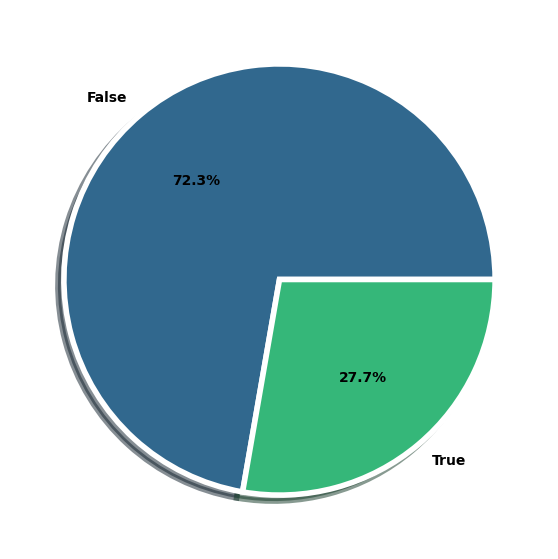

In [13]:
colors = sns.color_palette('viridis', len(read))
plt.figure(figsize=(7, 7))
plt.pie(read.values, labels=read.index, autopct='%1.1f%%', wedgeprops = { 'linewidth' : 4, 'edgecolor' : 'white' },   
        textprops={'color': "black", 'fontweight': 'bold'}, colors=colors, shadow=True)
plt.show()

In [14]:
def read_categories(col):
    # cols = df[col].dropna().unique()
    cols = df[col].value_counts().index
    num_cols = len(cols)
    fig, axes = plt.subplots(1, num_cols, figsize=(15, 5))

    for i, c in enumerate(cols):
        cdf = df[df[col] == c]
        read_counts = cdf['read'].value_counts()

        if num_cols == 1:
            ax = axes
        else:
            ax = axes[i]

        ax.pie(read_counts, labels = read_counts.index,  autopct='%1.1f%%', 
                          wedgeprops = { 'linewidth' : 4, 'edgecolor' : 'white' },   
                          textprops={'color': "black", 'fontweight': 'bold'}, colors=colors, shadow=True)
        ax.set_title(c)

        ax.axis('equal')

    plt.tight_layout()
    plt.show()

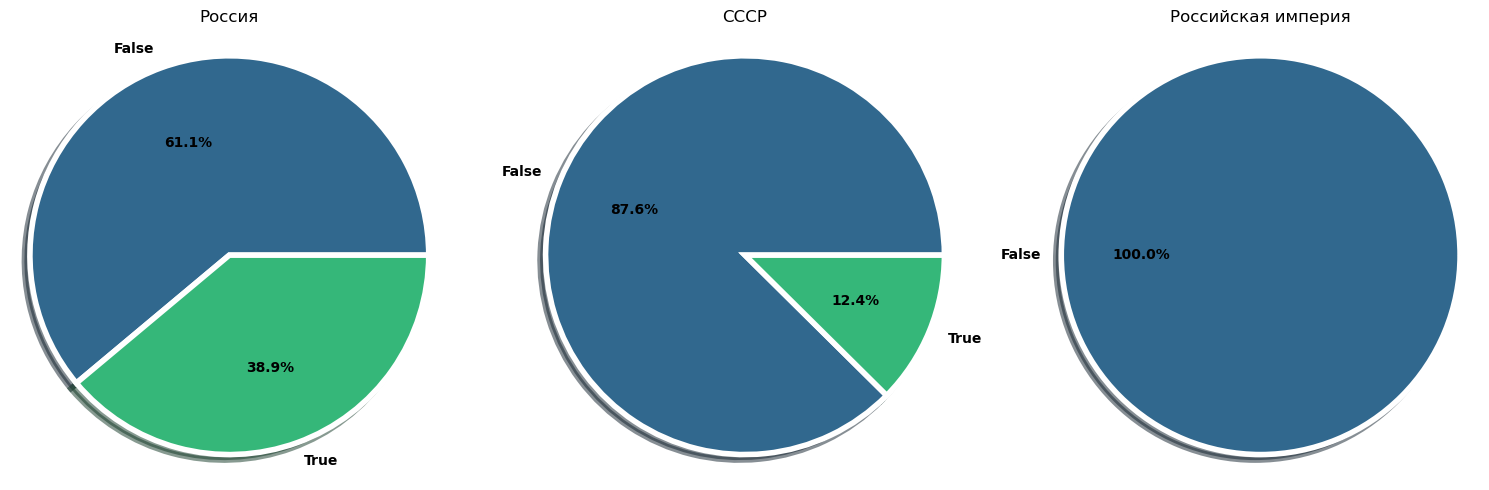

In [15]:
read_categories('historical_period')

<div class="alert alert-block alert-info" style="
            border-radius:2px;
            border: 1px solid #1C6EA4;
            background-color:#f0deaf;
            text-align: center; 
            font-family:Times New Roman;;
            letter-spacing:0.7px">

<h1 style="font-size: 18px; font-weight: bold;">
    TAG CLOUDS - AUTHORS, READ AUTHORS, PUBLISHERS
  </h1>
</div>

In [17]:
def wordcloud_from_freq(df, col_name, background_color="white", max_words = 20, width=1000, height=400):
    counts = df[col_name].value_counts()[:max_words]
    counts_dict = dict(zip(counts.index, counts.values))
    # all_text = ''.join(counts.index)
    # words = all_text.lower().split()

    wordcloud = WordCloud(width=width, height=height, background_color=background_color,
                          max_words=max_words, prefer_horizontal=0.9)
    wordcloud.generate_from_frequencies(counts_dict)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud of {col_name}', fontsize=16, fontweight='bold')

    plt.show()

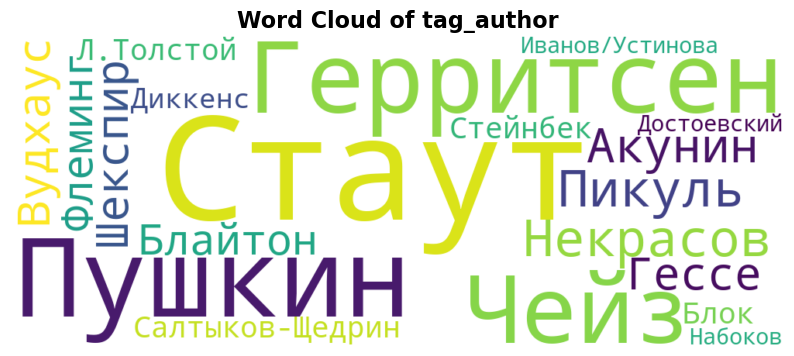

In [18]:
wordcloud_from_freq(df, 'tag_author')

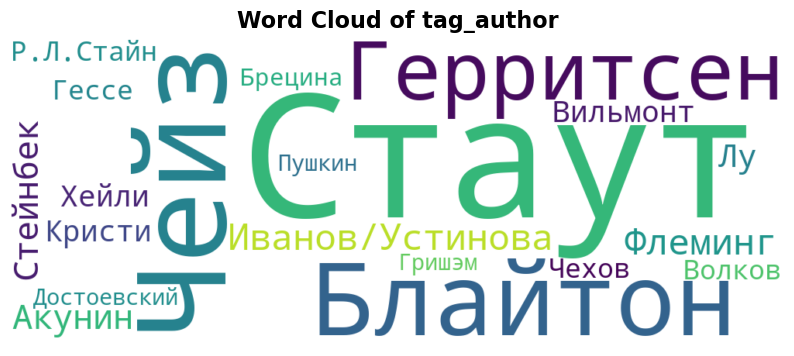

In [19]:
wordcloud_from_freq(df[df['read'] == True], 'tag_author')

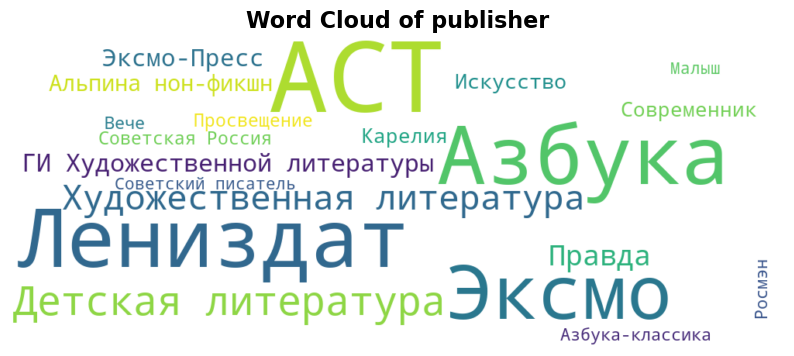

In [20]:
wordcloud_from_freq(df, 'publisher', max_words=20)

<div class="alert alert-block alert-info" style="
            border-radius:2px;
            border: 1px solid #1C6EA4;
            background-color:#f0deaf;
            text-align: center; 
            font-family:Times New Roman;;
            letter-spacing:0.7px">

<h1 style="font-size: 18px; font-weight: bold;">
    DISTRIBUTIONS
  </h1>
</div>

In [23]:
def dis_plots(df, cols):

    plt.figure(figsize=(18, 16))

    for i, col in enumerate(cols):
        plt.subplot(2,2,i+1)
        sns.histplot(df[col],
                color = '#0d47a1', kde=True)
        plt.title(f'{col} distribution')
      
    plt.tight_layout()
    plt.show()

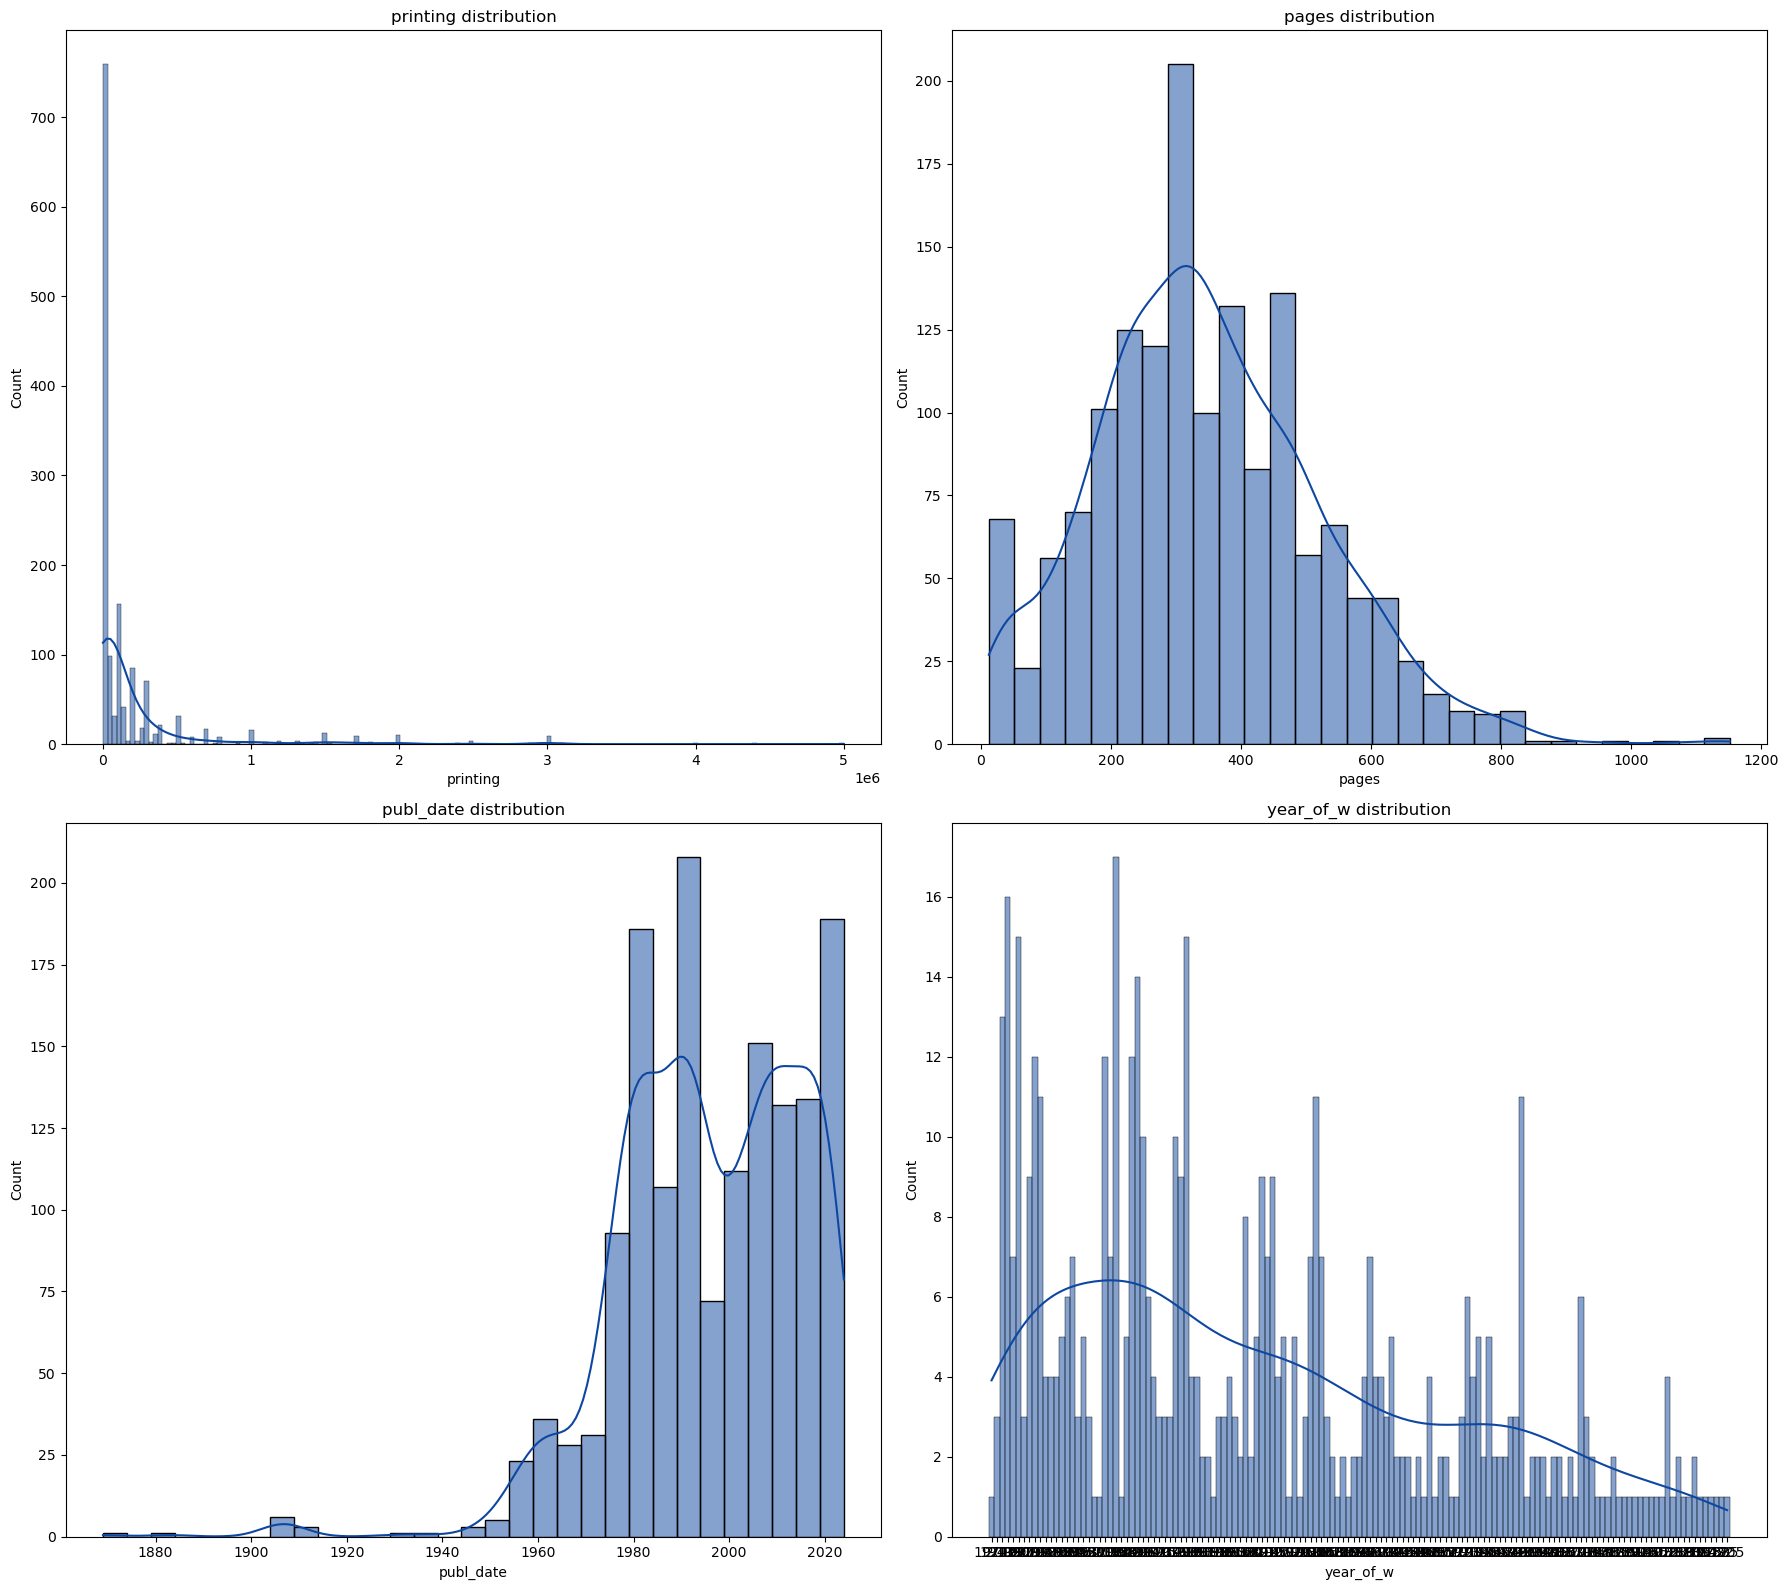

In [24]:
dist_columns = ['printing', 'pages', 'publ_date', 'year_of_w']
dis_plots(df, dist_columns)

<div class="alert alert-block alert-info" style="
            border-radius:2px;
            border: 1px solid #1C6EA4;
            background-color:#f0deaf;
            text-align: center; 
            font-family:Times New Roman;;
            letter-spacing:0.7px">

<h1 style="font-size: 18px; font-weight: bold;">
    BOXPLOTS - PAGES, PRINTING (READ OR NOT)
  </h1>
</div>

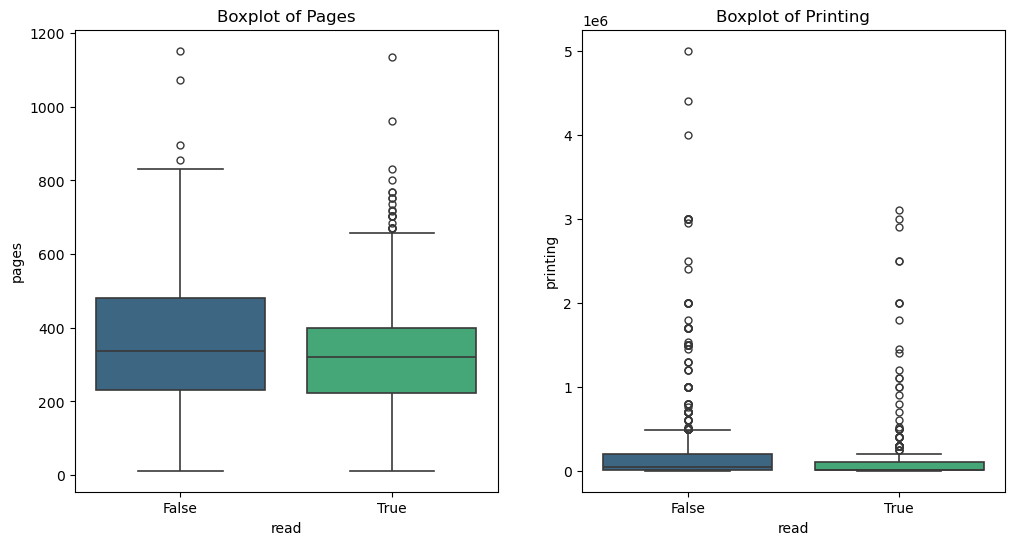

In [26]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.boxplot(x='read', y='pages', data=df,
           palette=colors, linewidth = 1.2,  fliersize=5, 
            whis=1.5)
plt.title('Boxplot of Pages')

plt.subplot(1,2,2)
sns.boxplot(x='read', y='printing', data=df,
           palette=colors, linewidth = 1.2,  fliersize=5, 
            whis=1.5)
plt.title('Boxplot of Printing')

plt.show()

<div class="alert alert-block alert-info" style="
            border-radius:2px;
            border: 1px solid #1C6EA4;
            background-color:#f0deaf;
            text-align: center; 
            font-family:Times New Roman;;
            letter-spacing:0.7px">

<h1 style="font-size: 18px; font-weight: bold;">
    CONDITION OF BOOKS
  </h1>
</div>

In [28]:
df[['cond', 'age']] = df['condition'].str.split(" - ", expand=True)

<Figure size 1000x1000 with 0 Axes>

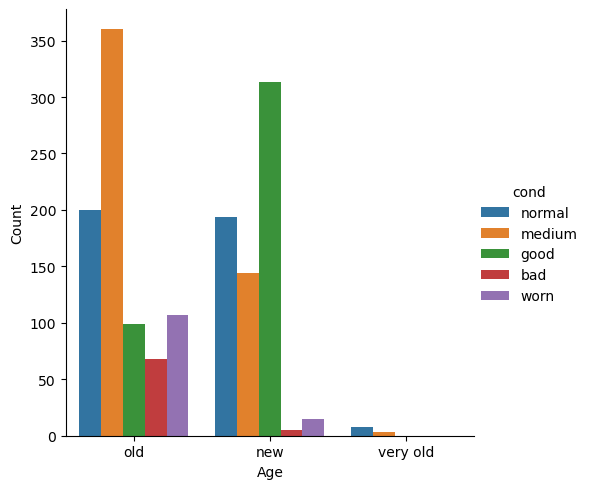

In [29]:
plt.figure(figsize=(10,10))

sns.catplot(x='age', hue='cond', 
            kind='count', data=df) 
  
plt.xlabel("Age") 
plt.ylabel("Count") 
plt.show()

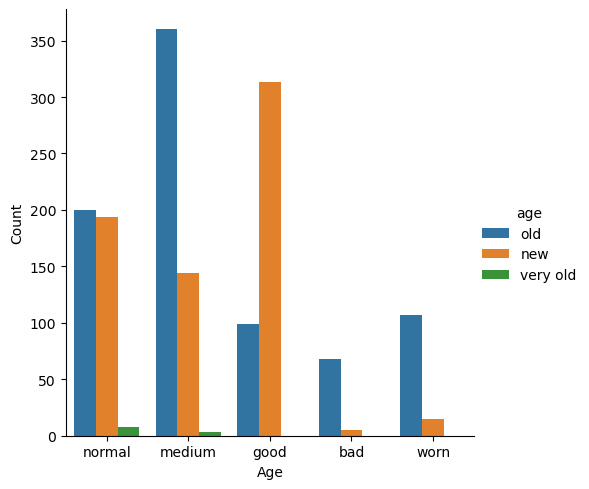

In [30]:
sns.catplot(x='cond', hue='age', 
            kind='count', data=df) 
  
plt.xlabel("Age") 
plt.ylabel("Count") 
plt.show()

### OTHER INFORMTATION - TO CONTINUE >>>

In [32]:
df['language'].value_counts()

language
русский            1484
english              29
старорусский          9
русский/deutsch       2
русский/english       1
Name: count, dtype: int64

In [33]:
df['type'].value_counts().index

Index(['роман', 'сборник рассказов', 'собрание сочинений', 'биография',
       'научпоп', 'сборник романов', 'поэзия', 'публицистика',
       'детская повесть', 'энциклопедия', 'сборник', 'история',
       'сборник сказок', 'повесть', 'сказка', 'рассказ', 'путеводитель',
       'сборник пьес', 'сборник повестей', 'пьеса', 'город', 'искусство',
       'сборник детских повестей', 'детская', 'учебное пособие',
       'автобиография', 'краеведение', 'география', 'альбом', 'кино',
       'натурализм', 'философия', 'фотокнига', 'мифы', 'народная медицина',
       'словарь', 'религия', 'письма', 'инфографика', 'научное пособие',
       'головоломки', 'главы из романа', 'пословицы', 'самоучитель', 'басни',
       'спорт', 'скороговорки'],
      dtype='object', name='type')

In [34]:
df['type'].value_counts()

type
роман                       559
сборник рассказов           110
собрание сочинений           99
биография                    90
научпоп                      73
сборник романов              59
поэзия                       54
публицистика                 48
детская повесть              40
энциклопедия                 38
сборник                      36
история                      33
сборник сказок               32
повесть                      31
сказка                       27
рассказ                      23
путеводитель                 15
сборник пьес                 15
сборник повестей             15
пьеса                        14
город                        13
искусство                    11
сборник детских повестей     10
детская                      10
учебное пособие               9
автобиография                 7
краеведение                   6
география                     6
альбом                        6
кино                          6
натурализм                    4
фил